In [1]:
import math
import numpy as  np 
#data analysis
import pandas as pd 
#visualization
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
data = pd.read_excel('data\anz.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
columns = data.columns
columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [4]:
data_salaries = data[data['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()
salaries= []
for customer_id in data['customer_id']:
    salaries.append(data_salaries.loc[customer_id]['amount'].mean())
data['annual_salary'] = salaries

In [5]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,annual_salary
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1013.67
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1013.67
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1002.13
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,892.09
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1013.67


In [6]:
data["date"] = pd.to_datetime(data["date"])
#By converting it to the datetime object in pandas we can access day name and month name
data["month"] = data["date"].dt.month_name()
data["day_name"] = data["date"].dt.day_name()
data.month

0         August
1         August
2         August
3         August
4         August
          ...   
12038    October
12039    October
12040    October
12041    October
12042    October
Name: month, Length: 12043, dtype: object

In [7]:
data.day_name

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
12038    Wednesday
12039    Wednesday
12040    Wednesday
12041    Wednesday
12042    Wednesday
Name: day_name, Length: 12043, dtype: object

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_features = missing_values_table(data)
missing_features

Your selected dataframe has 26 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
merchant_code,11160,92.7
bpay_biller_code,11158,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Which columns have more than 90% of missing values !?

In [10]:
missing_features_vars = list(missing_features.index[missing_features['% of Total Values'] > 90])
len(missing_features_vars)

2

In [11]:
data = data.drop(columns=missing_features_vars)
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,annual_salary,month,day_name
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1013.67,August,Wednesday
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1013.67,August,Wednesday
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1002.13,August,Wednesday
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,892.09,August,Wednesday
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1013.67,August,Wednesday


In [12]:
#function for dropping the columns
def to_drop(drop_cols,data=data):
    drop_cols = data.drop(columns=drop_cols,inplace=True)
    
drop_cols = ["account","long_lat","transaction_id","merchant_long_lat","first_name","customer_id","extraction","merchant_id",
             "card_present_flag","merchant_suburb","merchant_state","date"]
#drop the columns
to_drop(drop_cols)

In [13]:
missing_values_table(data)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [14]:
data.head()

,status,currency,txn_description,balance,gender,age,amount,country,movement,annual_salary,month,day_name
0,authorized,AUD,POS,35.39,F,26,16.25,Australia,debit,1013.67,August,Wednesday
1,authorized,AUD,SALES-POS,21.20,F,26,14.19,Australia,debit,1013.67,August,Wednesday
2,authorized,AUD,POS,5.71,M,38,6.42,Australia,debit,1002.13,August,Wednesday
3,authorized,AUD,SALES-POS,2117.22,F,40,40.90,Australia,debit,892.09,August,Wednesday
4,authorized,AUD,SALES-POS,17.95,F,26,3.25,Australia,debit,1013.67,August,Wednesday


In [15]:
data.corr()

,balance,age,amount,annual_salary
balance,1.000000,0.199329,0.059178,0.258141
age,0.199329,1.000000,0.029980,-0.083875
amount,0.059178,0.029980,1.000000,0.056425
annual_salary,0.258141,-0.083875,0.056425,1.000000


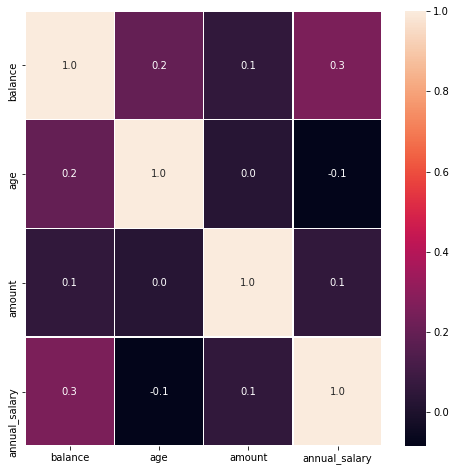

In [16]:
#correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [17]:
drop_less_corr = ["country","currency"]
to_drop(drop_less_corr,data=data)

Skewness in  numerical features:



<AxesSubplot:>

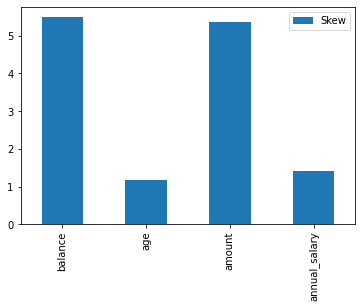

In [18]:
from scipy.stats  import skew
numerical_features = data.dtypes[data.dtypes != "object"].index
#skewness
skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna()))
print('Skewness in  numerical features:\n')
skewness =  pd.DataFrame({'Skew': skewed_features})
skewness.plot.bar(figsize=(6,4))

In [19]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lam)

There are 4 skewed numerical features to Box Cox transform


In [20]:
#Splitting data into features and target 
features = data.drop('annual_salary' , axis=1)
target = data['annual_salary']

In [21]:
def label_encoding(data):
    le = LabelEncoder()
    #list for storing categorical variables
    cat_indices = []
    #iterate through each column
    for i,col in enumerate(data):
        if features[col].dtype=="object":
            #map categorical variables to integer
            features[col] = le.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
            #record categorical indices
            cat_indices.append(i)
label_encoding(features)

In [22]:
#scale the data
from sklearn.preprocessing import RobustScaler
scaler = MinMaxScaler()
scaler.fit_transform(features)

array([[0.        , 0.8       , 0.12432416, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.10198442, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.8       , 0.05428666, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.8       , 0.72258847, ..., 1.        , 0.5       ,
        1.        ],
       [0.        , 1.        , 0.55159069, ..., 1.        , 0.5       ,
        1.        ],
       [0.        , 1.        , 0.47572404, ..., 1.        , 0.5       ,
        1.        ]])

In [23]:
#split into train and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state = 42)
len(features_train),len(features_test),len(target_train),len(target_test)

(8430, 3613, 8430, 3613)

In [24]:
def show_metrics(model,target_pred,target_test):
    mae = mean_absolute_error(target_pred,target_test)
    mse = mean_squared_error(target_pred,target_test)
    rmse = math.sqrt(mse)
    r2score = r2_score(target_pred,target_test)
    metrics = {"mae":[mae],"mse":[mse],"rmse":[rmse],"r2score":[r2score]}
    metrics_df = pd.DataFrame(data=metrics)
    return metrics_df
metrics_table = pd.DataFrame(columns=["Model","MSE","RMSE","R2SCORE"])

# Baselines
## Linear Regression

In [ ]:
from tpot import TPOTRegressor

reg = TPOTRegressor()
reg.fit(features_train,target_train)

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(features_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
target_pred = lin_reg.predict(features_test)

In [27]:
show_metrics("Linear regression",target_pred,target_test)

,mae,mse,rmse,r2score
0,1.277495,2.476907,1.573819,-1.776393


### Decision Tree

In [28]:
tree = DecisionTreeRegressor()
tree.fit(features_train,target_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [29]:
target_pred = tree.predict(features_test)

In [30]:
show_metrics("decisiontree",target_pred,target_test)

,mae,mse,rmse,r2score
0,0.21388,0.540593,0.73525,0.837302


In [31]:
rf = RandomForestRegressor()
rf.fit(features_train,target_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
rf_pred = rf.predict(features_test)
show_metrics("random forest",rf_pred,target_test)

,mae,mse,rmse,r2score
0,0.242931,0.278821,0.528035,0.904827


### Hyperparameter Tuning and Cross-Validation

In [33]:
from sklearn.model_selection import KFold, cross_val_score
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(features.values)
    rmse = np.sqrt(-cross_val_score(model,features.values,target,scoring="neg_mean_squared_error",cv=kf))
    return rmse

In [34]:
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge
linear =  LinearRegression()
lasso = Lasso(alpha =0.0005, random_state=1)
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
rf =  RandomForestRegressor(n_estimators= 1000, random_state=42)

In [35]:
lasso_score = rmsle_cv(lasso)
print("Lasso score: ",(lasso_score.mean()), (lasso_score.std()))

Lasso score:  1.6023985726609997 0.0963848628449236


In [36]:
enet_score = rmsle_cv(ENet)
print(f"Enet score {enet_score.mean()},{enet_score.std()}")

Enet score 1.6023973907333608,0.0963790338640007


In [37]:
krr_score = rmsle_cv(KRR)
print(f"KRR score {krr_score.mean()},{krr_score.std()}")

KRR score 1.5484973202869674,0.1764524224335467


In [38]:
rf_score = rmsle_cv(rf)
print(f"Random forest Score: {rf_score.mean()},{rf_score.std()}")

Random forest Score: 1.079694675495058,0.2784038436509268


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
#No of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1000,num=10)]
#no  of trees to consider at every split
max_features = ["auto","sqrt"]
#maximum depth of levels in tree
max_depth = [int(x) for x in np.linspace(5,50,num=5)]
max_depth.append(None)
#minimum no.of samples required to split
min_samples_split = [2,5,10]
#minimum no.of samples required at each leaf node
min_samples_leaf = [1,2,4]
#method of selecting samples for training each tree
bootstrap = [True,False]
#create the random grid
random_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf,
               "bootstrap": bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 16, 27, 38, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [29]:
#use random search to get best parameters
rf = RandomForestRegressor(random_state=42)
#random search parameters using  cross validation
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                              n_iter=100,scoring="neg_mean_squared_error",
                              cv=2,verbose=2,random_state=42,n_jobs=-1,return_train_score=True)

In [ ]:
rf_random.fit(features_train,target_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
